UFCG/CEEI/DEE - Campus de Campina Grande - Disciplina: Controle Analógico

Segunda avaliação - Atividade 2 - Período: 2021.1 - Professor: Saulo O. D. Luiz

**Nome: Filipe Soares Donato**

**Matrícula: 120111402**

Caros alunos e alunas,

Crie uma cópia deste notebook do colab por meio do menu Arquivo / Salvar uma cópia no Drive, e inclua seu nome e matrícula no nome do notebook.

Os itens identificados como (Cálculos à mão) devem ser respondidos à mão no papel ou mesa digitalizadora. É possível anexar a imagem digitalizada neste notebook do colab, ou fazer upload de um pdf na atividade. Por favor não anexem jpg ou png.

Os demais itens podem ser respondidos na forma de código no Python, resultados de cálculos e simulações nas células identificadas como (#Resposta), e texto nas células identificadas como (Resposta) neste notebook do colab.

Realize upload do notebook como arquivo do seu Drive. Por favor, não faça upload do link do arquivo.

Boa sorte!

In [48]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

O sistema de controle de posicionamento de um satélite é apresentado na Figura 1, em que $\theta(s)$ é o ângulo do satélite, $R(s)$ é a entrada de referência, $W(s)$ é a entrada de perturbação, $J =1 \cdot 10^2 kg \cdot m^2$ é o momento de inércia do satélite, $p_d = 100$, $K_p$ e $K_d$ são parâmetros de um controlador.

(a) (0.5 ponto) (Cálculos à mão) Utilizando o diagrama de projeto, determine a função de transferência da entrada de perturbação para a saída.

(b) (0.5 ponto) (Cálculos à mão) Apresente a região no plano complexo para os polos referentes à função de transferência da entrada de perturbação para a saída, tal que o tempo de acomodação seja **menor ou igual a**  $10 $ segundos.

(c) (0.5 ponto) (Cálculos à mão) Utilizando o diagrama de projeto, aloque na região determinada no item (b) um par de polos complexos conjugados (à sua escolha) referentes à função de transferência da entrada de perturbação para a saída.

(d) (0.5 ponto) (Cálculos à mão) Utilizando o diagrama de projeto, determine se a saída rastreia a referência quando a referência é nula e a entrada de perturbação é um degrau unitário.

(e) (0.5 ponto) Utilizando o diagrama de simulação: 

1. Apresente os sinais da saída e do erro quando é aplicado o degrau unitário na entrada de perturbação, e a referência é nula.
2. Usando a função stepinfo, determine se o tempo de acomodação da saída para um degrau na perturbação é **menor ou igual a**  $10 $ segundos. 
3. O sistema de controle rejeita um degrau na perturbação?

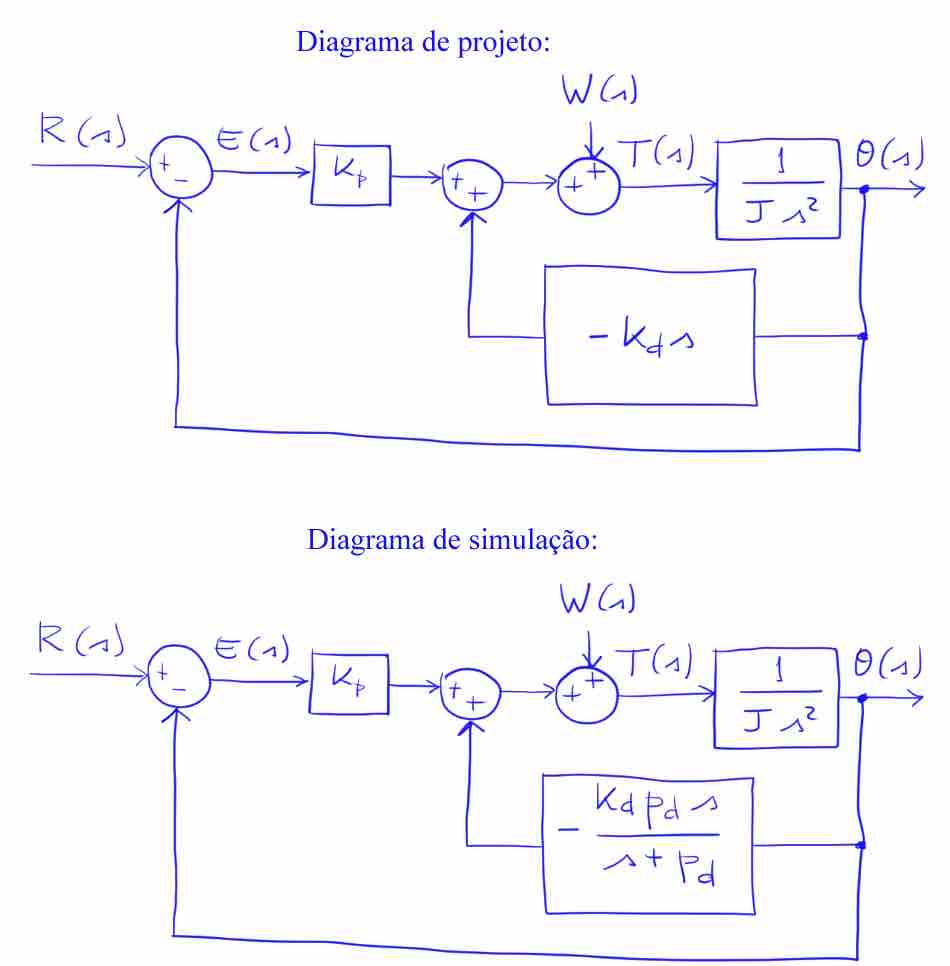
Figura 1: Diagramas de blocos do sistema de controle de posicionamento de um satélite.

# 1)

Resposta

a função de malha fechada será: 
 
             100
------------------------------
1e+04 s^2 + 3e+05 s + 6.25e+06



/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


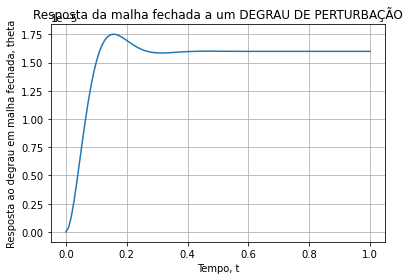

/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)



 Tempo de subida: 0.07442699290485807

 Tempo de pico: 0.15815735992282337

 Pico: 1.751593908061832e-05

 Sobre-sinal (%): 9.474619253864496

 Tempo de acomodação: 0.25119110105389597

 Valor de regime permanente: 1.6e-05


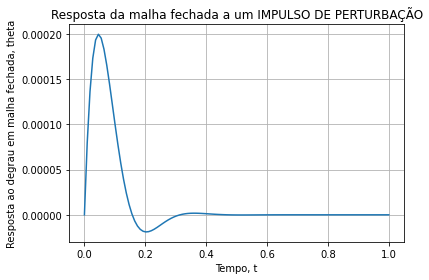

In [61]:
#Resposta letra E
from numpy import *
from control.matlab import *
import matplotlib.pyplot as plt

#Criar a variavel 's' pra usar na função de transferência
s = tf('s')

#Parâmetros
J = 100         #Momento de inércia de rolagem do navio (kg*m²)
pd = 100
kp = 62500
kd = 3000

A = 1 / (J*s**2)
B = kd*pd*(s/s(+pd)) + kp
H = feedback(A, B, sign=-1)


#H = tf([1/J , pd/J] , [1 , pd , (kp+kd*pd)/J , kd*pd/J])
print('a função de malha fechada será: \n', H)

#Vamos aplicar o degrau agora na perturbação
y,t = step(H, T=1)
plt.figure(2)
plt.plot(t,y) 
plt.xlabel('Tempo, t') 
plt.ylabel('Resposta ao degrau em malha fechada, theta')
plt.title('Resposta da malha fechada a um DEGRAU DE PERTURBAÇÃO')
plt.grid(True)
plt.show()

#Usando a função stepinfo, determine se o tempo de acomodação da saída 
#para um degrau na perturbação é menor ou igual a  10  segundos
S = stepinfo(H, SettlingTimeThreshold=0.01)
#Se quiser imprimir a linha com resultado em inglês digita: print(S)
print('\n Tempo de subida:', S["RiseTime"])
print('\n Tempo de pico:', S["PeakTime"])
print('\n Pico:', S["Peak"])
print('\n Sobre-sinal (%):', S["Overshoot"])
print('\n Tempo de acomodação:', S["SettlingTime"])
print('\n Valor de regime permanente:', S["SteadyStateValue"])

#Vamos aplicar um impulso agora na perturbação
y,t = impulse(H, T=1)
plt.figure(3)
plt.plot(t,y) 
plt.xlabel('Tempo, t') 
plt.ylabel('Resposta ao degrau em malha fechada, theta')
plt.title('Resposta da malha fechada a um IMPULSO DE PERTURBAÇÃO')
plt.grid(True)
plt.show()
